### Exercise 1
Python syntax and plot types. In a jupyter notebook generate 4 subplots on a 2x2 grid
with the following properties:
- A histogram of 1000 Gaussian random numbers, with x-axis limits between -5 and +5.
- A scatterplot of noisy data that should be aranged around a line of slope 1.
- A barplot of categories "A" to "Z" at every other letter, and the height of each bar should correspond to the position of each letter in the alphabet.
- A normal plot of cos(x), sin(x) and cos(x) − sin(x) in [−π; +π].

In [359]:
import string
import matplotlib.pyplot as plt
import numpy as np

plt

<module 'matplotlib.pyplot' from 'c:\\Users\\Xeonis7\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

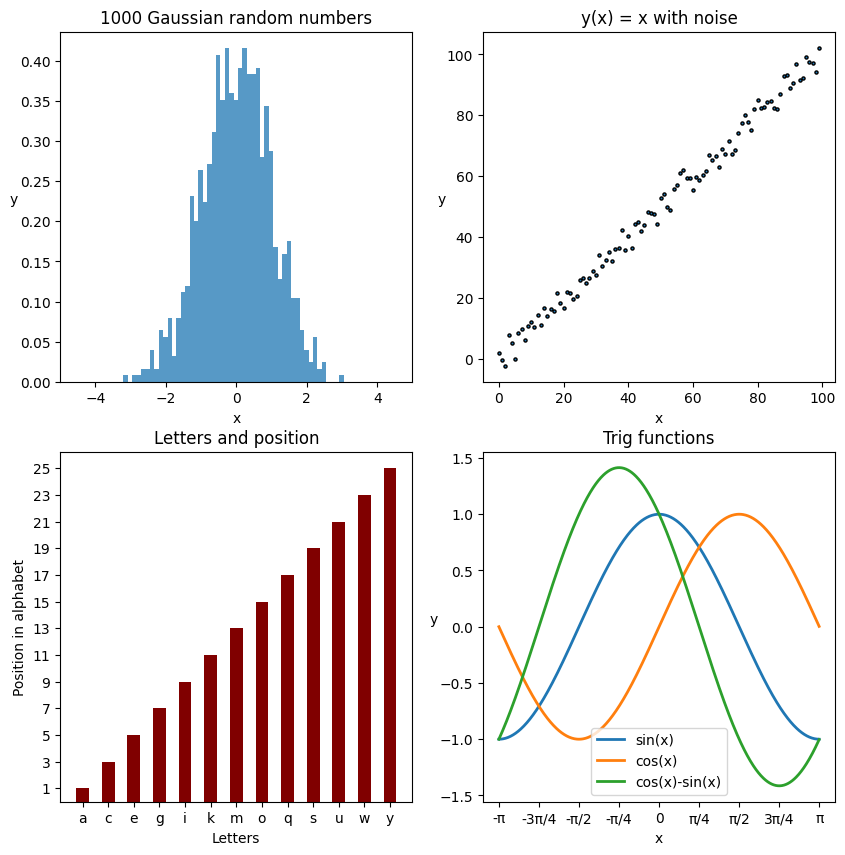

In [360]:
fig, ax = plt.subplots(2,2,figsize = (10,10))

#Subplt1
x_1 = np.random.normal(0, 1, 1000)
n, bins, patches = ax[0, 0].hist(x_1, 50, density = True, facecolor = "C0", alpha = 0.75)
ax[0, 0].set_title("1000 Gaussian random numbers")
ax[0, 0].set_xlim([-5, 5])
ax[0, 0].set_xlabel("x")
ax[0, 0].set_ylabel("y", rotation = 0)


#Subplt2
x_2 = np.arange(0, 100, 1)
y_2 = np.zeros(100)
for i in range(100):
    y_2[i] = i + np.random.uniform(-5,5)
ax[0, 1].scatter(x_2, y_2, s=5, facecolor='C0', edgecolor='k')
ax[0, 1].set_title("y(x) = x with noise")
ax[0, 1].set_xlabel("x")
ax[0, 1].set_ylabel("y", rotation=0)


#Subplt3
alph = list(string.ascii_lowercase)
x_3 = np.empty(13, dtype = str)
for i in range(13):
    x_3[i] = alph[2*i]
y_3 = np.arange(1,26,2)
ax[1, 0].bar(x_3, y_3, color = "maroon", width = 0.5)
ax[1, 0].set_title("Letters and position")
ax[1, 0].set_xlabel("Letters")
ax[1, 0].set_ylabel("Position in alphabet")
ax[1, 0].set_yticks(y_3)


#Subplt4
pi = "\u03C0"
x_4 = np.arange(-np.pi, np.pi , 0.01)
y_4_1 = np.cos(x_4)
line1, = ax[1, 1].plot(x_4, y_4_1, lw = 2)
y_4_2 = np.sin(x_4)
line2, = ax[1, 1].plot(x_4, y_4_2, lw=2)
y_4_3 = np.cos(x_4) - np.sin(x_4)
line3, = ax[1, 1].plot(x_4, y_4_3, lw=2)

#x-Axis ticks
l = np.arange(-np.pi, np.pi+0.01, (2*np.pi)/8)
x_4_name = np.empty(9, dtype=str)
x_4_name = np.array(["-" + pi, ("-3" + pi + "/4"), ("-" + pi + "/2"), ("-" +
                    pi + "/4"), "0", (pi + "/4"), (pi + "/2"), ("3" + pi + "/4"), pi])
ax[1, 1].set_xticks(l)
ax[1, 1].set_xticklabels(x_4_name)

#Labels
ax[1, 1].set_title("Trig functions")
ax[1, 1].set_xlabel("x")
ax[1, 1].set_ylabel("y", rotation=0)
ax[1, 1].legend([line1, line2, line3], ["sin(x)", "cos(x)", "cos(x)-sin(x)"], loc = 0 )


### Exercise 2
Plotting "real" data. Download the file ex3_grades.dat from Moodle. You should perform
the following tasks:
- Read in the data file using numpy.
- Create a histogram of grades with the following key: < 60% = 5, 60.00% − 69.99% = 4, 70.00% − 79.99% = 3, 80.00% − 89.99% = 2, 90.00% − 100.00% = 1.
- Find and print the 5 best students, their scores, and their grades.
- Compute and print the lowest, highest and average scores and add this information to the histogram figure.

# Exercise 3
Plotting "real" data. Download the fileex3_co2.datfrom Moodle. You should performthe following tasks:
- Read in the data file.
- Compute the total CO2emission of each country/region from 1950 onwards and create abarplot.
- Show the development from 1950 onwards for the top countries/regions